## Bag of words, TF-IDF and Word2Vec
Term Frequency and Inverted Document Frequency

#### Steps to install Python package wordcloud into Python 3.6
python -m pip install wordcloud-1.4.1-cp36-cp36m-win_amd64.whl
download the whl file form https://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud

In [55]:
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import requests
import re

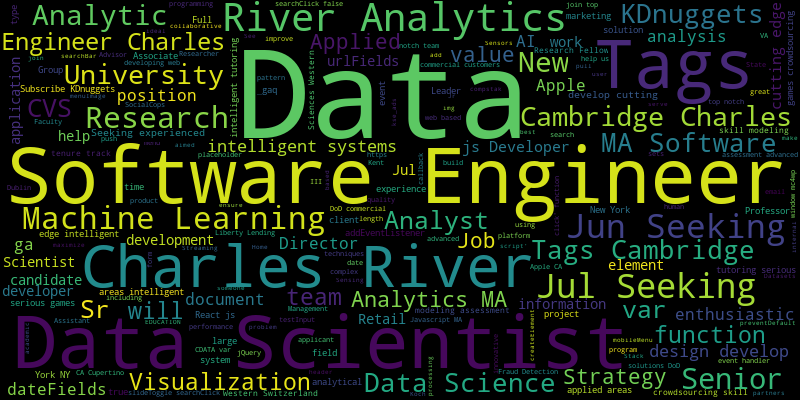

In [56]:
response = requests.get("http://www.datasciencecourse.org")
response = requests.get("https://www.kdnuggets.com/jobs/index.html")
root = BeautifulSoup(response.text, 'lxml')
wc = WordCloud(width=800, height=400).generate(re.sub(r"\s+"," ",root.text))
wc.to_image()

In [57]:
documents = ["the goal of this lecture is to explain the basics of free text processing",
             "the bag of words model is one such approach",
             "text processing via bag of words"]

In [58]:
document_words = [doc.split() for doc in documents]
vocab = sorted(set(sum(document_words,[])))
vocab_dict = {k:i for i,k in enumerate(vocab)}
vocab_dict   # setting up a vocab dictionary

{'approach': 0,
 'bag': 1,
 'basics': 2,
 'explain': 3,
 'free': 4,
 'goal': 5,
 'is': 6,
 'lecture': 7,
 'model': 8,
 'of': 9,
 'one': 10,
 'processing': 11,
 'such': 12,
 'text': 13,
 'the': 14,
 'this': 15,
 'to': 16,
 'via': 17,
 'words': 18}

In [59]:
import numpy as np
X_tf = np.zeros((len(documents), len(vocab)),dtype=int)
for i,doc in enumerate(document_words):
    for word in doc:
        X_tf[i,vocab_dict[word]] += 1
print(X_tf)

[[0 0 1 1 1 1 1 1 0 2 0 1 0 1 2 1 1 0 0]
 [1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1]]


### IDF (Inverted Document Frequency) of a word j = log(number of documents / number of documents with word j)

In [60]:
idf = np.log(X_tf.shape[0] / X_tf.astype(bool).sum(axis=0))
idf

array([1.09861229, 0.40546511, 1.09861229, 1.09861229, 1.09861229,
       1.09861229, 0.40546511, 1.09861229, 1.09861229, 0.        ,
       1.09861229, 0.40546511, 1.09861229, 0.40546511, 0.40546511,
       1.09861229, 1.09861229, 1.09861229, 0.40546511])

### TFIDF

In [61]:
X_tfidf = X_tf * idf
print(X_tfidf)

[[0.         0.         1.09861229 1.09861229 1.09861229 1.09861229
  0.40546511 1.09861229 0.         0.         0.         0.40546511
  0.         0.40546511 0.81093022 1.09861229 1.09861229 0.
  0.        ]
 [1.09861229 0.40546511 0.         0.         0.         0.
  0.40546511 0.         1.09861229 0.         1.09861229 0.
  1.09861229 0.         0.40546511 0.         0.         0.
  0.40546511]
 [0.         0.40546511 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.40546511
  0.         0.40546511 0.         0.         0.         1.09861229
  0.40546511]]


## Cosine similarity on TFIDF

In [62]:
X_tfidf_norm = X_tfidf / np.linalg.norm(X_tfidf, axis=1)[:,None]
M = X_tfidf_norm @ X_tfidf_norm.T
print(M)

[[1.         0.06796739 0.07771876]
 [0.06796739 1.         0.10281225]
 [0.07771876 0.10281225 1.        ]]


## Cosine similarity on TF

In [63]:
X_tf_norm = X_tf / np.linalg.norm(X_tf,axis = 1)[:,None]
M = X_tf_norm @ X_tf_norm.T
print(M) # seems to be little higher projection of similarilty in comparison with TFIDF cosine similarity

[[1.         0.3928371  0.38490018]
 [0.3928371  1.         0.40824829]
 [0.38490018 0.40824829 1.        ]]


## Using gensim

In [93]:
import gensim as gs
from gensim.models import Word2Vec

# set up a corpus in gensim
documents = [
    "San Francisco has some excellent new restaurants",
    "Boston is a city with great cusine",
    "PostgreSQL is a relational database management system"
]
words = [d.split() for d in documents]
dictionary = gs.corpora.Dictionary(words)
corpus = [dictionary.doc2bow(w) for w in words]

2018-07-28 11:17:34,570 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-07-28 11:17:34,579 : INFO : built Dictionary(19 unique tokens: ['Francisco', 'San', 'excellent', 'has', 'new']...) from 3 documents (total 21 corpus positions)


In [65]:
print([i for i in dictionary.items()])
dictionary.doc2bow

[(0, 'Francisco'), (1, 'San'), (2, 'excellent'), (3, 'has'), (4, 'new'), (5, 'restaurants'), (6, 'some'), (7, 'Boston'), (8, 'a'), (9, 'city'), (10, 'cusiine'), (11, 'great'), (12, 'is'), (13, 'with'), (14, 'PostgreSQL'), (15, 'database'), (16, 'management'), (17, 'relational'), (18, 'system')]


<bound method Dictionary.doc2bow of <gensim.corpora.dictionary.Dictionary object at 0x000000000CB344A8>>

In [66]:
## A simpler example on how the doc2bow (bag of words) work
dct = gs.corpora.Dictionary(["máma mele maso".split(), "ema má máma".split()])
print([i for i in dct.items()])
dct.doc2bow(["this", "is", "máma"])

2018-07-28 10:57:30,900 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-07-28 10:57:30,906 : INFO : built Dictionary(5 unique tokens: ['maso', 'mele', 'máma', 'ema', 'má']) from 2 documents (total 6 corpus positions)


[(0, 'maso'), (1, 'mele'), (2, 'máma'), (3, 'ema'), (4, 'má')]


[(2, 1)]

### Create TFIDF X as CSC sparse matrix, get cosine similarities

In [67]:
tfidf = gs.models.TfidfModel(corpus)
X = gs.matutils.corpus2csc(tfidf[corpus])
sims = gs.similarities.MatrixSimilarity(tfidf[corpus])
M = sims.get_similarities(tfidf[corpus])

2018-07-28 10:57:34,082 : INFO : collecting document frequencies
2018-07-28 10:57:34,089 : INFO : PROGRESS: processing document #0
2018-07-28 10:57:34,095 : INFO : calculating IDF weights for 3 documents and 18 features (21 matrix non-zeros)
2018-07-28 10:57:34,099 : WARNING : scanning corpus to determine the number of features (consider setting `num_features` explicitly)
2018-07-28 10:57:34,102 : INFO : creating matrix with 3 documents and 19 features
D:\softwares\Anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [68]:
print(X.data)
M

[0.37796447 0.37796447 0.37796447 0.37796447 0.37796447 0.37796447
 0.37796447 0.43550663 0.16073254 0.43550663 0.43550663 0.43550663
 0.16073254 0.43550663 0.16073254 0.16073254 0.43550663 0.43550663
 0.43550663 0.43550663 0.43550663]


array([[0.99999994, 0.        , 0.        ],
       [0.        , 1.        , 0.0516699 ],
       [0.        , 0.0516699 , 0.99999994]], dtype=float32)

## A simple gensim word2vec model

In [69]:
import gzip
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# preview the file 
with gzip.open("reviews_data.txt.gz","rb") as f:
    for i, line in enumerate(f):
        print(line)
        break

b"Oct 12 2009 \tNice trendy hotel location not too bad.\tI stayed in this hotel for one night. As this is a fairly new place some of the taxi drivers did not know where it was and/or did not want to drive there. Once I have eventually arrived at the hotel, I was very pleasantly surprised with the decor of the lobby/ground floor area. It was very stylish and modern. I found the reception's staff geeting me with 'Aloha' a bit out of place, but I guess they are briefed to say that to keep up the coroporate image.As I have a Starwood Preferred Guest member, I was given a small gift upon-check in. It was only a couple of fridge magnets in a gift box, but nevertheless a nice gesture.My room was nice and roomy, there are tea and coffee facilities in each room and you get two complimentary bottles of water plus some toiletries by 'bliss'.The location is not great. It is at the last metro stop and you then need to take a taxi, but if you are not planning on going to see the historic sites in Be

In [70]:
def read_input(input_file):
    """This method reads a gzip file format"""
    logging.info("reading file {0}.. this may take some time".format(input_file))
    with gzip.open(input_file, "rb") as f:
        for i, line in enumerate(f):
            if (i % 10000 == 0):
                logging.info("read {0} reviews".format(i))
            # do some preprocessing and return list of words for each review text
            yield gs.utils.simple_preprocess(line)      

In [71]:
import os
if os.path.isfile("word2vec.model"):
    ## retrieve the model
    model = Word2Vec.load("word2vec.model")
else:
    ## read the raw text file in gzip format
    documents = list(read_input("reviews_data.txt.gz"))
    logging.info("done reading data file")     
    ## Training the Word2Vec model
    model = gs.models.Word2Vec(documents, size=150,window=10, min_count=2, workers=10)
    model.train(documents, total_examples= len(documents), epochs= 10)
    ## save the model
    model.save("word2vec.model")

2018-07-28 10:57:44,690 : INFO : loading Word2Vec object from word2vec.model
2018-07-28 10:57:44,995 : INFO : loading wv recursively from word2vec.model.wv.* with mmap=None
2018-07-28 10:57:44,996 : INFO : loading vectors from word2vec.model.wv.vectors.npy with mmap=None
2018-07-28 10:57:45,129 : INFO : setting ignored attribute vectors_norm to None
2018-07-28 10:57:45,131 : INFO : loading vocabulary recursively from word2vec.model.vocabulary.* with mmap=None
2018-07-28 10:57:45,132 : INFO : loading trainables recursively from word2vec.model.trainables.* with mmap=None
2018-07-28 10:57:45,134 : INFO : loading syn1neg from word2vec.model.trainables.syn1neg.npy with mmap=None
2018-07-28 10:57:45,278 : INFO : setting ignored attribute cum_table to None
2018-07-28 10:57:45,280 : INFO : loaded word2vec.model


In [72]:
w1 = "dirty"
model.wv.most_similar(positive=w1)

2018-07-28 10:57:46,995 : INFO : precomputing L2-norms of word weight vectors
D:\softwares\Anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('filthy', 0.8736082315444946),
 ('stained', 0.7919926643371582),
 ('unclean', 0.7852156758308411),
 ('smelly', 0.7620192766189575),
 ('grubby', 0.7457408905029297),
 ('dusty', 0.7455694079399109),
 ('dingy', 0.7271550297737122),
 ('disgusting', 0.7201720476150513),
 ('gross', 0.7188948392868042),
 ('mouldy', 0.7140050530433655)]

In [73]:
w1 = "polite"
model.wv.most_similar(positive=w1, topn=6)

D:\softwares\Anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('courteous', 0.9196060299873352),
 ('friendly', 0.8198479413986206),
 ('cordial', 0.8058872222900391),
 ('professional', 0.8012988567352295),
 ('curteous', 0.7749333381652832),
 ('attentive', 0.7728056907653809)]

### similarity between two words

In [74]:
model.wv.similarity(w1="dirty",w2 ="smelly")

D:\softwares\Anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.76201934

In [75]:
## king + woman - man = queen
model.wv.most_similar(positive=['woman','king'], negative=['man'], topn=1)

D:\softwares\Anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('queen', 0.7816528081893921)]

In [76]:
## odd one out!
model.doesnt_match("breakfast cereal dinner lunch".split())

D:\softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  
D:\softwares\Anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'cereal'

In [77]:
## similarity score
model.similarity('woman','man')

D:\softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
D:\softwares\Anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.7829922

In [80]:
## getting the raw output vector of a word
model['computer']

D:\softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([-4.93945092e-01, -1.80963528e+00,  1.48260260e+00, -4.92193222e-01,
       -2.44368851e-01,  6.17996812e-01,  1.07146227e+00, -4.58347034e+00,
       -7.80388772e-01,  2.35937142e+00,  1.06864035e-01,  3.99052858e-01,
       -3.77507150e-01,  2.02474403e+00,  1.43363667e+00, -1.36768520e+00,
       -1.41998112e+00, -2.45629597e+00,  3.24686319e-01, -4.19928885e+00,
       -3.07770133e+00, -1.58816898e+00,  4.53143692e+00,  1.73554325e+00,
       -5.75516224e+00, -2.00794435e+00,  1.50387788e+00, -2.49930525e+00,
        1.39051950e+00, -1.82079959e+00, -4.32393408e+00, -1.60832012e+00,
       -9.09523726e-01,  3.72254878e-01,  2.80547810e+00,  1.56288671e+00,
       -1.59570825e+00, -5.42212188e-01, -3.47559857e+00,  2.16612744e+00,
        3.90879798e+00, -2.40559340e+00, -1.23316276e+00,  1.73020160e+00,
       -2.42268384e-01,  6.63911939e-01,  2.75164366e+00, -3.40420556e+00,
        3.31777549e+00, -3.03607392e+00,  2.05266356e+00, -2.18533611e+00,
       -2.07710910e+00, -

In [83]:
## Load a pretrained model of word2vec
# model1 = gs.models.KeyedVectors.load_word2vec_format('deps.words', binary=False)

## get word vectors
model.wv['pittsburgh']

# compute most similar entries
model.similar_by_vector(model.wv['pittsburgh'])

# analogies by vector addition
model.similar_by_vector(model.wv["king"] - model.wv["man"] + model.wv['woman'])

D:\softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  
D:\softwares\Anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
D:\softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  # This is added back by InteractiveShellApp.init_path()


[('king', 0.8815550804138184),
 ('queen', 0.8103371858596802),
 ('twin', 0.6372830867767334),
 ('double', 0.6262825727462769),
 ('kingsize', 0.6104873418807983),
 ('kingsized', 0.5731028318405151),
 ('superking', 0.5683693885803223),
 ('dbl', 0.5529084801673889),
 ('queensize', 0.551460862159729),
 ('murphy', 0.5062829256057739)]

In [98]:
## construct cosine similarity from word2vec documentation representation
X = np.array([sum(model.wv[w.lower()] if w.lower() in model.wv else 0 for w in doc) for doc in words])
X = X / np.linalg.norm(X, axis=1)[:,None]
print(X.dot(X.T))

[[1.0000001  0.6058456  0.02146433]
 [0.6058456  0.9999999  0.11229121]
 [0.02146433 0.11229121 0.99999994]]
